In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

df_train=pd.read_csv('/content/drive/MyDrive/NLP/SMS_train (1).csv',encoding='ISO-8859-1')
df_test=pd.read_csv('/content/drive/MyDrive/NLP/SMS_test (2).csv',encoding='ISO-8859-1')

In [50]:
df_train

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [51]:
df_test

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [52]:
df=pd.concat([df_train,df_test],axis=0,ignore_index=True)
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [53]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [54]:
df.tail()

,S. No.,Message_body,Label
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
1081,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [55]:
df.shape

(1082, 3)

In [56]:
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [57]:
df=df.drop(['S. No.'],axis=1)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [58]:
df.dtypes

Message_body    object
Label           object
dtype: object

In [59]:
df.columns

Index(['Message_body', 'Label'], dtype='object')

In [60]:
df['Label'].value_counts()

Non-Spam    884
Spam        198
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

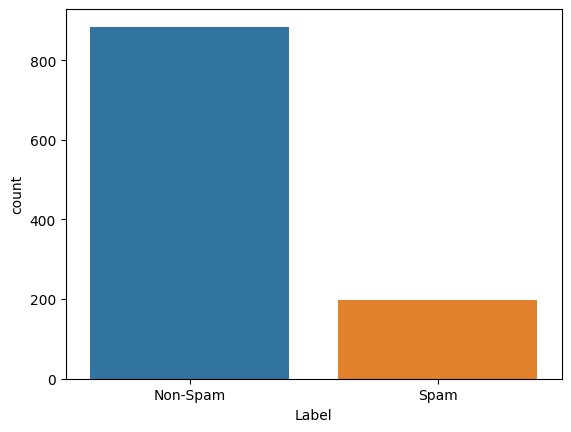

In [61]:
sns.countplot(x='Label',data=df)

In [62]:
df['Label'].replace({'Non-Spam':1,'Spam':-1},inplace=True)
df

,Message_body,Label
0,Rofl. Its true to its name,1
1,The guy did some bitching but I acted like i'd...,1
2,"Pity, * was in mood for that. So...any other s...",1
3,Will ü b going to esplanade fr home?,1
4,This is the 2nd time we have tried 2 contact u...,-1
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,1
1078,Try to do something dear. You read something f...,1
1079,Sun ah... Thk mayb can if dun have anythin on....,1
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",1


In [63]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [64]:
smess=df.Message_body
smess

0                              Rofl. Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity, * was in mood for that. So...any other s...
3                    Will ü b going to esplanade fr home?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear. You read something f...
1079    Sun ah... Thk mayb can if dun have anythin on....
1080    SYMPTOMS when U are in love: "1.U like listeni...
1081    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [65]:
f=lambda x,y:x+y

In [66]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
smess=smess.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
smess

0                             Rofl . Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity , * was in mood for that . So ... any oth...
3                   Will ü b going to esplanade fr home ?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear . You read something ...
1079    Sun ah ... Thk mayb can if dun have anythin on...
1080    SYMPTOMS when U are in love : " 1 . U like lis...
1081    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

In [67]:
smess=smess.str.replace('[^a-zA-Z0-9]+',' ')
print(smess)

0                               Rofl Its true to its name
1       The guy did some bitching but I acted like i d...
2       Pity was in mood for that So any other suggest...
3                      Will b going to esplanade fr home 
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear You read something fo...
1079    Sun ah Thk mayb can if dun have anythin on Thk...
1080    SYMPTOMS when U are in love 1 U like listening...
1081     Great Have a safe trip Dont panic surrender all 
Name: Message_body, Length: 1082, dtype: object


<ipython-input-67-6501e7521964>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  smess=smess.str.replace('[^a-zA-Z0-9]+',' ')


In [68]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
smess=smess.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
smess

0                                 rofl it true to it name
1       the guy did some bitch but i act like i d be i...
2          piti was in mood for that so ani other suggest
3                           will b go to esplanad fr home
4       this is the 2nd time we have tri 2 contact u u...
                              ...                        
1077    7 wonder in my world 7th you 6th ur style 5th ...
1078       tri to do someth dear you read someth for exam
1079    sun ah thk mayb can if dun have anythin on thk...
1080    symptom when u are in love 1 u like listen son...
1081        great have a safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

In [69]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
smess=smess.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:" ".join(x))
smess

0                                          rofl true name
1       guy bitch act like interest buy someth els nex...
2                                   piti mood ani suggest
3                                   b go esplanad fr home
4       2nd time tri 2 contact u u 750 pound prize 2 c...
                              ...                        
1077    7 wonder world 7th 6th ur style 5th ur smile 4...
1078                     tri someth dear read someth exam
1079    sun ah thk mayb dun anythin thk book e lesson ...
1080    symptom u love 1 u like listen song 2 u get st...
1081                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [70]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(smess)
train_data             #x-variable
print(train_data)

  (0, 1849)	0.5086856793431559
  (0, 2727)	0.5352804139572925
  (0, 2257)	0.6743246681420617
  (1, 1189)	0.19084717659108363
  (1, 2787)	0.2620897628588603
  (1, 1234)	0.3166286972359124
  (1, 2873)	0.22002695063463382
  (1, 1878)	0.25587622919424974
  (1, 1034)	0.29329608266677626
  (1, 2448)	0.26551480891862445
  (1, 677)	0.26551480891862445
  (1, 1475)	0.307577621142851
  (1, 1623)	0.20980773882403927
  (1, 396)	0.3419878575694143
  (1, 607)	0.36211655551990307
  (1, 1307)	0.2588858462402129
  (2, 2548)	0.5165656915002457
  (2, 463)	0.36716239650585775
  (2, 1802)	0.5469696796701571
  (2, 2038)	0.5469696796701571
  (3, 1384)	0.3883344606933877
  (3, 1185)	0.630740525885995
  (3, 1062)	0.5956800313099777
  (3, 1263)	0.3106896135077221
  (4, 2170)	0.24144740187001762
  :	:
  (1079, 1819)	0.2633677871797729
  (1079, 2553)	0.2544650331411059
  (1079, 1611)	0.2410408066920934
  (1079, 628)	0.23101411970886698
  (1079, 2647)	0.4820816133841868
  (1079, 1734)	0.21063371947658105
  (1079, 1

In [71]:
train_data.shape 

(1082, 2997)

In [72]:
y=df['Label'].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [73]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)
y_train

array([ 1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
       -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1, -1,  1,  1,  1

In [74]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
svm_model=SVC()
nb_model=MultinomialNB()
knn_model=KNeighborsClassifier()
rf_model=RandomForestClassifier()
df_model=DecisionTreeClassifier()
lst_model=[svm_model,nb_model,knn_model,rf_model,df_model]

In [75]:
from sklearn.metrics import confusion_matrix,classification_report
for i in lst_model:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("*********************************************")
  print(classification_report(y_test,y_pred))
  print("*********************************************")
  print("*********************************************")
  print(confusion_matrix(y_test,y_pred))

SVC()
*********************************************
              precision    recall  f1-score   support

          -1       1.00      0.61      0.76        56
           1       0.92      1.00      0.96       269

    accuracy                           0.93       325
   macro avg       0.96      0.80      0.86       325
weighted avg       0.94      0.93      0.93       325

*********************************************
*********************************************
[[ 34  22]
 [  0 269]]
MultinomialNB()
*********************************************
              precision    recall  f1-score   support

          -1       1.00      0.64      0.78        56
           1       0.93      1.00      0.96       269

    accuracy                           0.94       325
   macro avg       0.97      0.82      0.87       325
weighted avg       0.94      0.94      0.93       325

*********************************************
*********************************************
[[ 36  20]
 [  0 269]]
KN